In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [5]:
import psycopg2
import pandas as pd
import psycopg2.extras

In [6]:
import numpy as np

In [7]:
import matplotlib as plt

In [8]:
class PostgresCon(object):
    def __init__(self):
        self.connection = psycopg2.connect(database="econdb",
                                           user = "postgres",
                                           password = "Justdoit007",
                                           host = "127.0.0.1",
                                           port = "5432")

    def getConnection(self):
        print("Connection to DB established!")
        return self.connection

In [9]:
con = PostgresCon().getConnection()

Connection to DB established!


# Q1

### Division wise

In [10]:
cur = con.cursor()
select_stmnt = "SELECT  st.division, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key " \
                "GROUP BY CUBE(st.division) ORDER BY st.division " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

In [11]:
records

[('BARISAL', Decimal('7520343.75')),
 ('CHITTAGONG', Decimal('19763595.00')),
 ('DHAKA', Decimal('40764619.75')),
 ('KHULNA', Decimal('11311610.50')),
 ('RAJSHAHI', Decimal('12099196.00')),
 ('RANGPUR', Decimal('8429836.50')),
 ('SYLHET', Decimal('5512234.25')),
 (None, Decimal('105401435.75'))]

In [12]:
dataframe = pd.DataFrame(records, columns=['division', 'total price'])
dataframe = dataframe.drop(7)
dataframe

,division,total price
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


In [13]:
dataframe['total price'] = dataframe['total price'].astype('float64')

In [14]:
dataframe.dtypes

division        object
total price    float64
dtype: object

In [15]:
dataframe

,division,total price
0,BARISAL,7520343.75
1,CHITTAGONG,19763595.00
2,DHAKA,40764619.75
3,KHULNA,11311610.50
4,RAJSHAHI,12099196.00
5,RANGPUR,8429836.50
6,SYLHET,5512234.25


<Axes: >

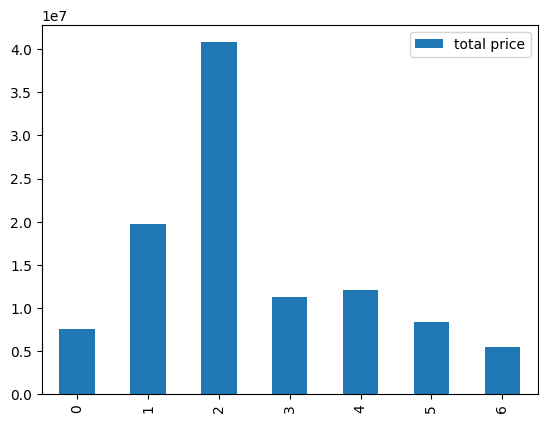

In [16]:
dataframe.plot.bar(y='total price')

## year wise

In [17]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT  tt.year, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.time_dim tt " \
                "WHERE ft.time_key = tt.time_key " \
                "GROUP BY CUBE(tt.year) ORDER BY tt.year " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [18]:
records

[(2014, Decimal('14334731.25')),
 (2015, Decimal('15095720.25')),
 (2016, Decimal('14976508.25')),
 (2017, Decimal('15015806.00')),
 (2018, Decimal('15108197.25')),
 (2019, Decimal('14949510.25')),
 (2020, Decimal('15037190.25')),
 (2021, Decimal('883772.25')),
 (None, Decimal('105401435.75'))]

In [19]:
df_year = pd.DataFrame(records, columns=['year', 'total price'])
df_year = df_year.drop(8)
df_year

,year,total price
0,2014.0,14334731.25
1,2015.0,15095720.25
2,2016.0,14976508.25
3,2017.0,15015806.00
4,2018.0,15108197.25
5,2019.0,14949510.25
6,2020.0,15037190.25
7,2021.0,883772.25


In [20]:
df_year = df_year.set_index(['year'])

In [21]:
df_year

,total price
year,
2014.0,14334731.25
2015.0,15095720.25
2016.0,14976508.25
2017.0,15015806.00
2018.0,15108197.25
2019.0,14949510.25
2020.0,15037190.25
2021.0,883772.25


In [22]:
df_year['total price'] = df_year['total price'].astype('float64')

<Axes: xlabel='year'>

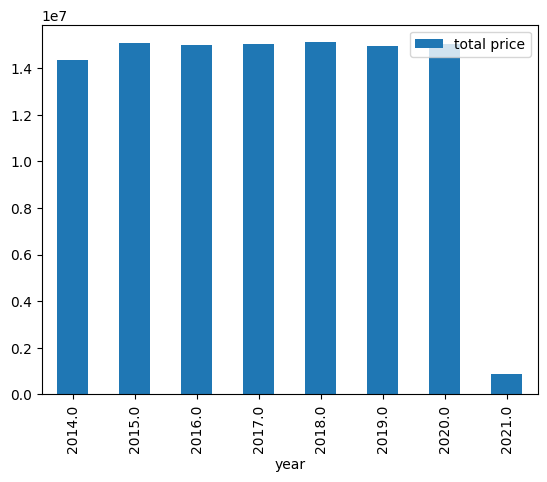

In [23]:
df_year.plot.bar(y='total price')

# Q1

## customer

In [24]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT  ct.name, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.customer_dim ct " \
                "WHERE ft.customer_key = ct.customer_key " \
                "GROUP BY CUBE(ct.name) ORDER BY ct.name " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [25]:
records

[('-', Decimal('20643.50')),
 ('aafreen fatima', Decimal('11174.75')),
 ('aafrin', Decimal('22136.75')),
 ('aafrin @ dolly', Decimal('23529.75')),
 ('aaftaab husan', Decimal('9682.00')),
 ('aakanksha', Decimal('11469.00')),
 ('aaliya', Decimal('21663.25')),
 ('aamina', Decimal('12649.25')),
 ('aamir', Decimal('10134.00')),
 ('aamir hussain', Decimal('10892.50')),
 ('aamod & pramod', Decimal('12280.25')),
 ('aamrin jahan', Decimal('11622.00')),
 ('aanamika misra', Decimal('8929.25')),
 ('aanchal', Decimal('35703.50')),
 ('aanik with her son', Decimal('8568.25')),
 ('aansi devi', Decimal('9909.00')),
 ('aanya @ china', Decimal('11443.50')),
 ('aaradhana @ priyanka', Decimal('11469.25')),
 ('aarifa bano', Decimal('11295.75')),
 ('aarifun bivi', Decimal('13139.25')),
 ('aarti', Decimal('661675.25')),
 ('aarti @ kajal', Decimal('12108.50')),
 ('aarti @ noni', Decimal('12335.50')),
 ('aarti bunkar', Decimal('13661.75')),
 ('aarti devi', Decimal('26537.00')),
 ('aarti diwakar', Decimal('10892

In [26]:
df_customer = pd.DataFrame(records, columns=['name', 'total price'])
df_customer

,name,total price
0,-,20643.50
1,aafreen fatima,11174.75
2,aafrin,22136.75
3,aafrin @ dolly,23529.75
4,aaftaab husan,9682.00
...,...,...
4533,मन्जू,10575.75
4534,माया,9862.50
4535,सरोज,11280.00
4536,सानिया,11010.00


In [27]:
df_customer = df_customer.drop(4537)

In [28]:
df_customer

,name,total price
0,-,20643.50
1,aafreen fatima,11174.75
2,aafrin,22136.75
3,aafrin @ dolly,23529.75
4,aaftaab husan,9682.00
...,...,...
4532,बबीता,10509.75
4533,मन्जू,10575.75
4534,माया,9862.50
4535,सरोज,11280.00


## transaction

In [53]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT  tt.trans_type, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.trans_dim tt " \
                "WHERE ft.payment_key = tt.payment_key " \
                "GROUP BY CUBE(tt.trans_type) ORDER BY tt.trans_type " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [54]:
records

[('card', Decimal('94583038.50')),
 ('cash', Decimal('2708515.75')),
 ('mobile', Decimal('8109881.50')),
 (None, Decimal('105401435.75'))]

In [75]:
df_trans = pd.DataFrame(records, columns=['trans type', 'total price'])

In [76]:
df_trans

,trans type,total price
0,card,94583038.50
1,cash,2708515.75
2,mobile,8109881.50
3,None,105401435.75


In [77]:
df_trans['total price'] = df_trans['total price'].astype('float64')
df_trans = df_trans.drop(3)

In [78]:
df_trans = df_trans.set_index(['trans type'])

In [79]:
df_trans

,total price
trans type,
card,94583038.50
cash,2708515.75
mobile,8109881.50


<Axes: ylabel='total price'>

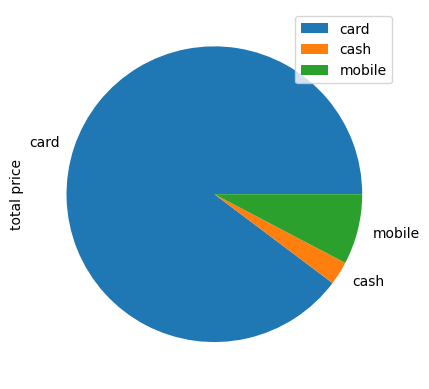

In [80]:
df_trans.plot.pie(y='total price')

# Q3

In [36]:
cur = con.cursor()
select_stmnt = "SELECT  st.division, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key AND st.division = 'BARISAL' " \
                "GROUP BY CUBE(st.division) ORDER BY st.division " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

In [37]:
records

[('BARISAL', Decimal('7520343.75')), (None, Decimal('7520343.75'))]

In [38]:
df_barisal = pd.DataFrame(records, columns=['district', 'total price'])

In [39]:
df_barisal = df_barisal.drop(1)
df_barisal

,district,total price
0,BARISAL,7520343.75


# Q4

In [40]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = "SELECT  tt.year, sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.time_dim tt " \
                "WHERE ft.time_key = tt.time_key AND tt.year = 2015 " \
                "GROUP BY CUBE(tt.year) ORDER BY tt.year " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [41]:
records

[(2015, Decimal('15095720.25')), (None, Decimal('15095720.25'))]

In [42]:
df_2015 = pd.DataFrame(records, columns=['year', 'total_price'])
df_2015 = df_2015.drop(1)
df_2015

,year,total_price
0,2015.0,15095720.25


# Q5

In [43]:
cur = con.cursor()
select_stmnt = "SELECT sum(ft.total_price) " \
                "FROM star_schema.fact_table ft, star_schema.store_dim st, star_schema.time_dim tt " \
                "WHERE ft.store_key = st.store_key AND ft.time_key = tt.time_key AND st.division = 'BARISAL' AND tt.year = 2015 " \
                "GROUP BY st.division,tt.year ORDER BY st.division " 
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

In [44]:
records

[(Decimal('1076902.75'),)]

# Q6

In [45]:
con = PostgresCon().getConnection()
cur = con.cursor()
select_stmnt = " SELECT rank_filter.* FROM (SELECT st.store_key, it.item_key, sum(ft.quantity), RANK() OVER (PARTITION BY st.store_key ORDER BY sum(ft.quantity) DESC) " \
                "FROM star_schema.fact_table ft, star_schema.item_dim it, star_schema.store_dim st " \
                "WHERE ft.store_key = st.store_key AND ft.item_key = it.item_key " \
                "GROUP BY st.store_key, it.item_key ORDER BY st.store_key ASC, sum(ft.quantity) DESC) rank_filter WHERE RANK <= 3 "
cur.execute(select_stmnt)
records = cur.fetchall()
cur.close()

Connection to DB established!


In [46]:
records

[('S0001', 'I00142', 78, 1),
 ('S0001', 'I00057', 71, 2),
 ('S0001', 'I00047', 70, 3),
 ('S0002', 'I00216', 83, 1),
 ('S0002', 'I00236', 80, 2),
 ('S0002', 'I00089', 78, 3),
 ('S0002', 'I00130', 78, 3),
 ('S0003', 'I00018', 74, 1),
 ('S0003', 'I00214', 71, 2),
 ('S0003', 'I00027', 70, 3),
 ('S0003', 'I00233', 70, 3),
 ('S0004', 'I00201', 79, 1),
 ('S0004', 'I00243', 69, 2),
 ('S0004', 'I00086', 68, 3),
 ('S0005', 'I00216', 86, 1),
 ('S0005', 'I00121', 85, 2),
 ('S0005', 'I00009', 82, 3),
 ('S0006', 'I00183', 82, 1),
 ('S0006', 'I00263', 80, 2),
 ('S0006', 'I00123', 77, 3),
 ('S0007', 'I00129', 80, 1),
 ('S0007', 'I00076', 76, 2),
 ('S0007', 'I00048', 71, 3),
 ('S0007', 'I00231', 71, 3),
 ('S0008', 'I00053', 73, 1),
 ('S0008', 'I00201', 70, 2),
 ('S0008', 'I00225', 69, 3),
 ('S0009', 'I00083', 79, 1),
 ('S0009', 'I00019', 68, 2),
 ('S0009', 'I00264', 66, 3),
 ('S0009', 'I00126', 66, 3),
 ('S0010', 'I00130', 82, 1),
 ('S0010', 'I00251', 78, 2),
 ('S0010', 'I00254', 77, 3),
 ('S00100', 'I

In [47]:
df_q6 = pd.DataFrame(records, columns=['store key', 'item key', 'quantity', 'rank'])
df_q6 = df_q6.set_index(['store key'])

In [48]:
df_q6

,item key,quantity,rank
store key,,,
S0001,I00142,78,1
S0001,I00057,71,2
S0001,I00047,70,3
S0002,I00216,83,1
S0002,I00236,80,2
...,...,...,...
S0098,I00234,75,2
S0098,I00010,66,3
S0099,I00100,86,1


In [50]:
df_q6 = df_q6.drop(['rank'],axis=1)

In [51]:
df_q6

,item key,quantity
store key,,
S0001,I00142,78
S0001,I00057,71
S0001,I00047,70
S0002,I00216,83
S0002,I00236,80
...,...,...
S0098,I00234,75
S0098,I00010,66
S0099,I00100,86
